# Assignment 1 - Following Gradient

In [81]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
import random
import matplotlib.animation as animation

## Task 1

Find all local max and min values for the following function:

$ y = 3x - 6x^3 - x^4 + 4 $ where $ -6 \leq x \leq 1 $ 

In [2]:
### First, create an array with values in range of x
x_range = np.linspace(start = -6, stop = 1, num = 100000)
x_range

array([-6.     , -5.99993, -5.99986, ...,  0.99986,  0.99993,  1.     ])

In [3]:
### Solve the equation for y values
y_range = 3*x_range - 6*x_range**3 - x_range**4 + 4
y_range

array([-1.40000000e+01, -1.39846704e+01, -1.39693418e+01, ...,
        2.65955622e-03,  1.32989570e-03,  0.00000000e+00])

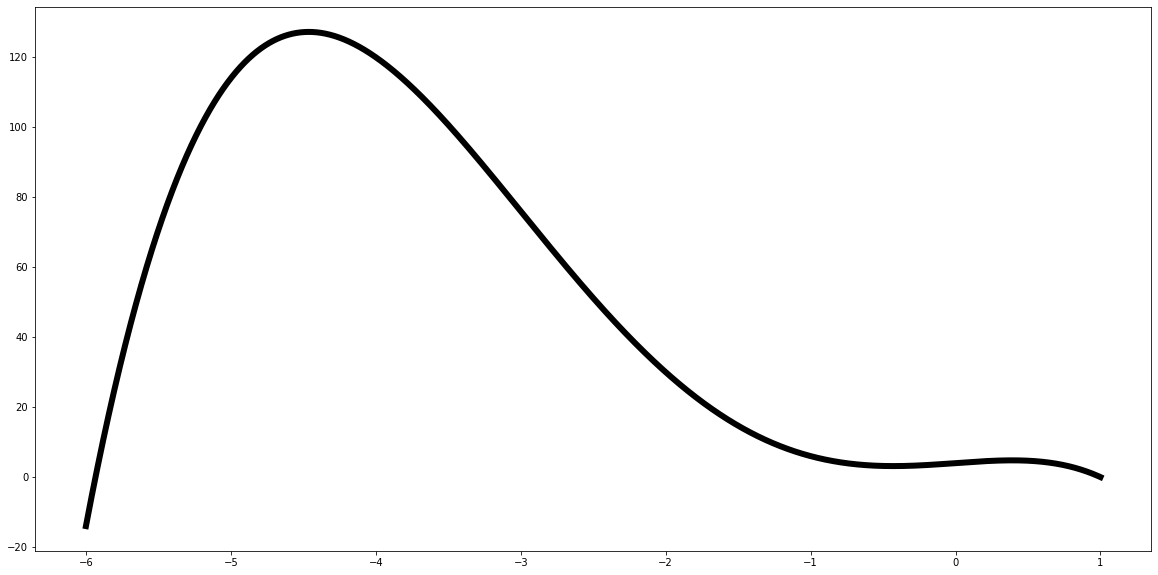

In [4]:
## Visualize function
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(x_range, y_range, color='k', linewidth = 6)

### Follow the gradient to find local extrema

In [5]:
def moveLeft(start_pos):
    
    dydx = np.Inf
    
    ### Set start of path
    path = [start_pos]
    
    ### Move left initially
    current_pos = start_pos - 0.01
    path.append(current_pos)
    
    i = 1
    
    ### Run processes until derivative is close to 0
    while (abs(dydx) > 0.01):
        
        ### Check if current position is close to lower bounds
        if (abs(current_pos - (-6.0)) <= 0.01):
            ### Mark the end of path as end of bounds
            path.append(-6.0)
            return np.array(path)
        
        else:
            ### Calculate gradient of current position
            x = torch.tensor(current_pos, requires_grad = True)
            y = 3*x - 6*x**3 - x**4 + 4
            y.backward()
            dydx = x.grad.item()
#             print('Postion: {} \tDyDx: {}'.format(current_pos, dydx))
            
            
            ### If still far from dydx = 0
            if (abs(dydx) >= 2):
                ### Keep moving at current rate
                current_pos = current_pos - 0.01
                path.append(current_pos)
                
            ### If closing in on dydx = 0
            else:
                ### Lower step size
                current_pos = current_pos - 0.0001
                path.append(current_pos)
            
    ### Once the process is done, return path
    return np.array(path)

In [6]:
def moveRight(start_pos):
    
    dydx = np.Inf
    
    ### Set start of path
    path = [start_pos]
    
    ### Move right initially
    current_pos = start_pos + 0.01
    path.append(current_pos)
    
    ### Run processes until derivative is close to 0
    while (abs(dydx) > 0.01):
        
        ### Check if current position is close to upper bounds
        if (abs(current_pos - (1.0)) <= 0.01):
            ### Mark the end of path as end of bounds
            path.append(1.0)
            return np.array(path)
        
        else:
            ### Calculate gradient of current position
            x = torch.tensor(current_pos, requires_grad = True)
            y = 3*x - 6*x**3 - x**4 + 4
            y.backward()
            dydx = x.grad.item()
#             print('Postion: {} \tDyDx: {}'.format(current_pos, dydx))
            
            ### If still far from dydx = 0
            if (abs(dydx) >= 2):
                ### Keep moving at current rate
                current_pos = current_pos + 0.01
                path.append(current_pos)
                
            ### If closing in on dydx = 0
            else:
                ### Lower step size
                current_pos = current_pos + 0.0001
                path.append(current_pos)
        
    ### Once the process is done, return path
    return np.array(path)

In [7]:
def animate2d(frames):
    
    left.set_data(left_path[:frames], y_left[:frames])
    left.set_linewidth(3)
    right.set_data(right_path[:frames], y_right[:frames])
    right.set_linewidth(3)
    
    return left, right

MovieWriter ffmpeg unavailable; using Pillow instead.


Example -5.1
Finding local extrema
Calculating y values
Processing animation
Done

Example -4.2
Finding local extrema


MovieWriter ffmpeg unavailable; using Pillow instead.


Calculating y values
Processing animation
Done

Example -2.2
Finding local extrema


MovieWriter ffmpeg unavailable; using Pillow instead.


Calculating y values
Processing animation
Done

Example -0.5
Finding local extrema


MovieWriter ffmpeg unavailable; using Pillow instead.


Calculating y values
Processing animation


MovieWriter ffmpeg unavailable; using Pillow instead.


Done

Example 0.5
Finding local extrema
Calculating y values
Processing animation
Done



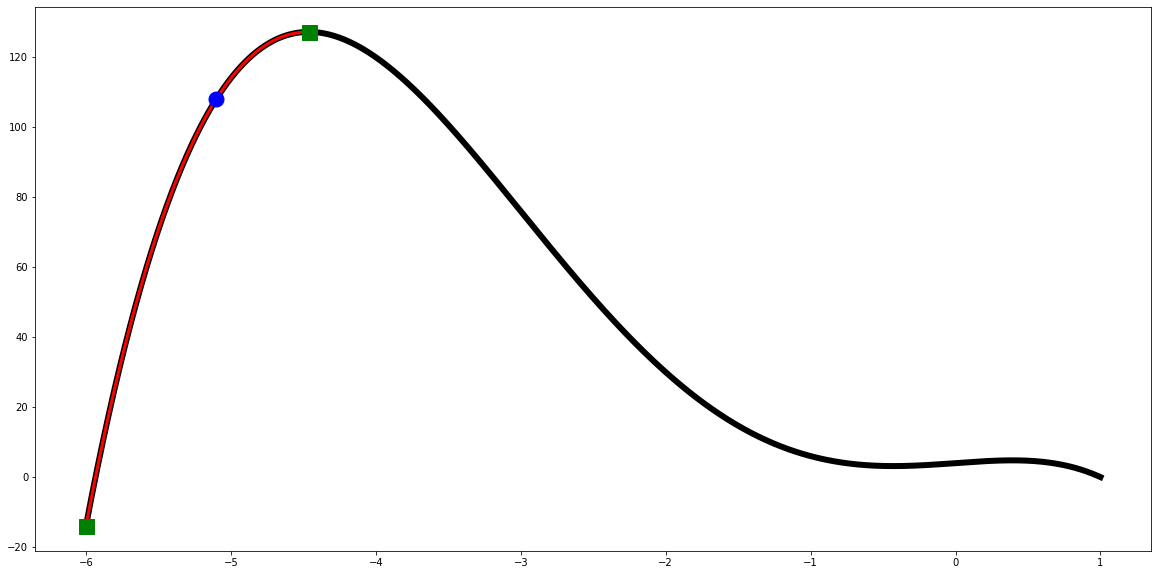

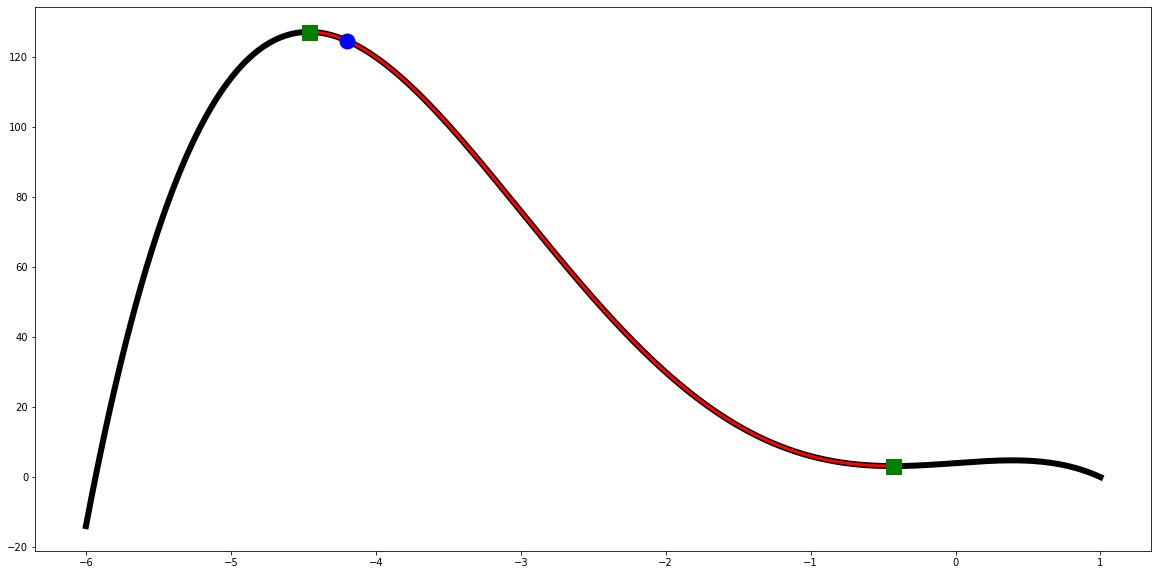

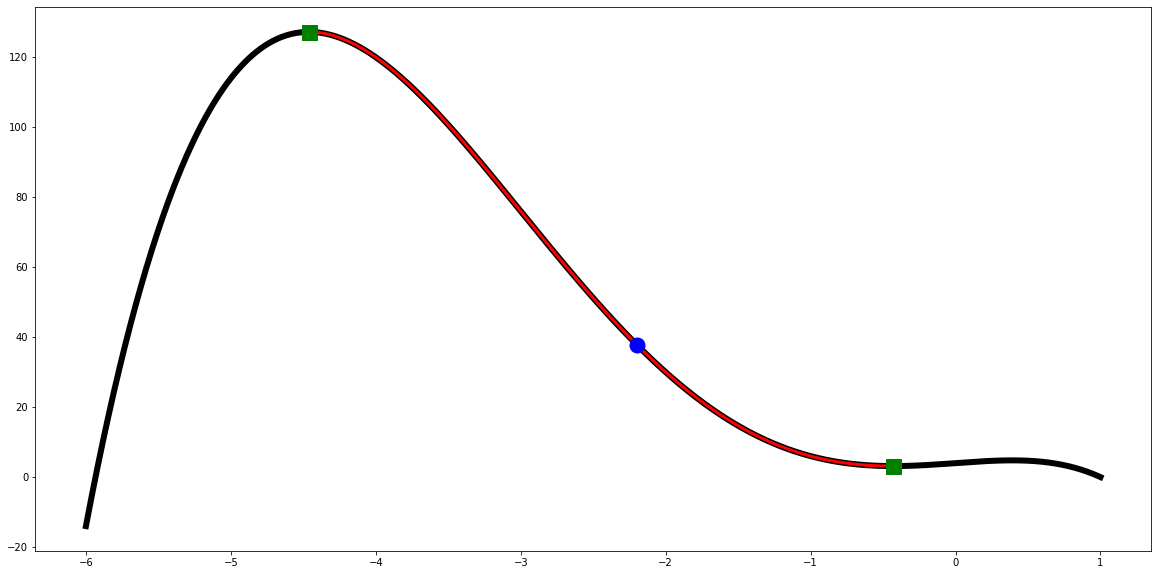

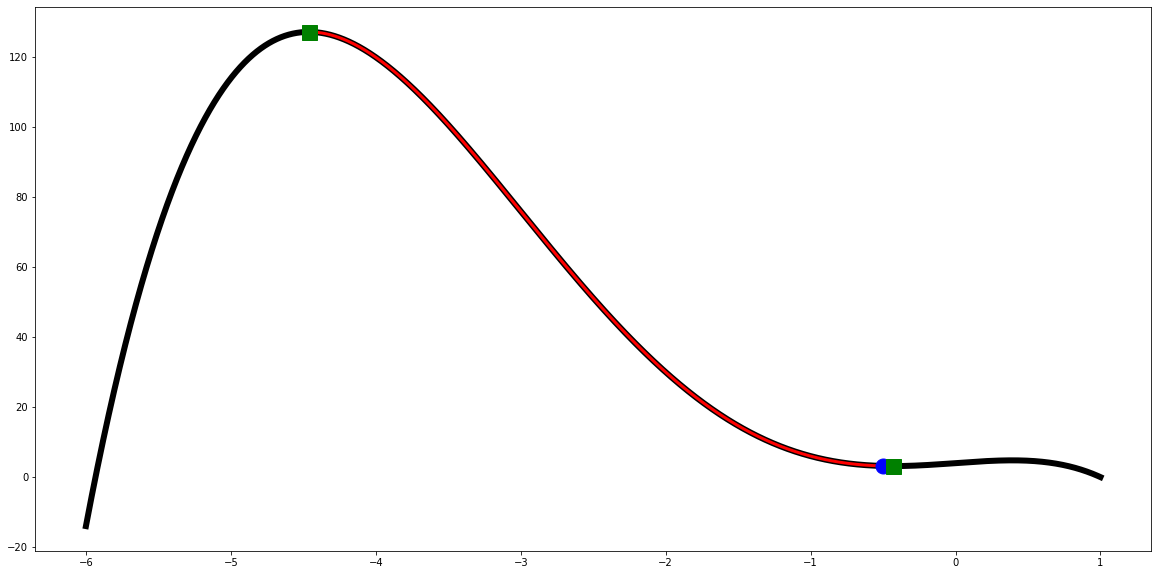

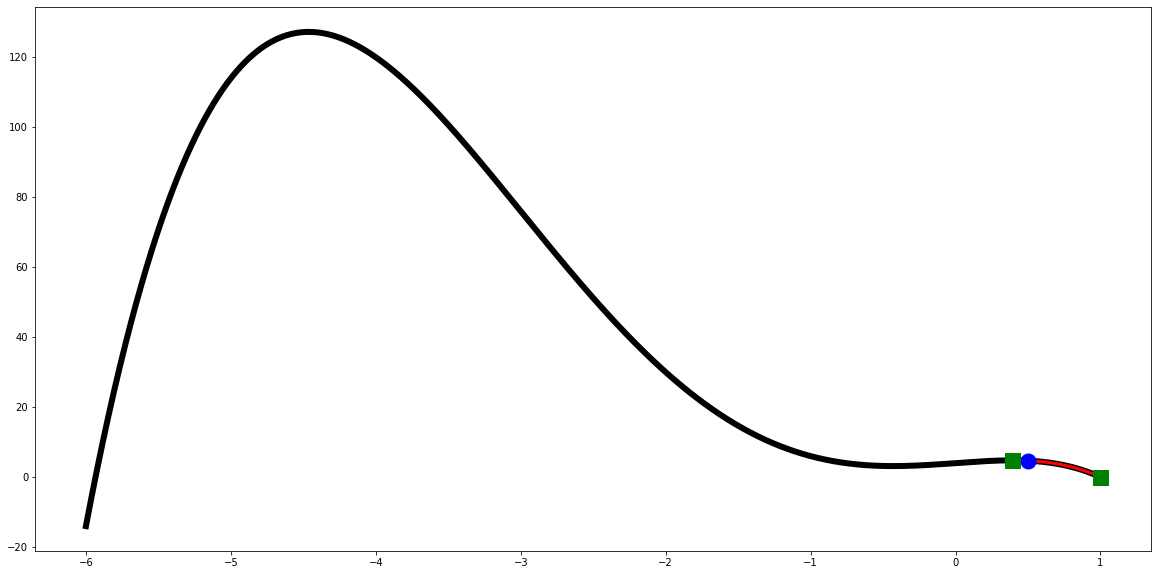

In [8]:
### Generate 5 examples
starting_points = [-5.1, -4.2, -2.2, -0.5, 0.5]

k = 0

for i in starting_points:

    right_path = []
    left_path = []
    
    print('Example ' + str(i))
    print('Finding local extrema')

    ### Start at a random location
#     start_pos = random.uniform(-6.0, 1.0)
    start_pos = i

    ### Check if the start position is very close to the interval bounds

    ### If close to -6, move right
    if (abs(start_pos - (-6.0)) < 0.01):
        left_path = np.array([-6.0])
        right_path = moveRight(start_pos)

    ### If close to 1, move left
    elif (abs(start_pos - (1.0)) < 0.01):
        right_path = np.array([1.0])
        left_path = moveLeft(start_pos)

    ### Else, Move left and right
    else:
        left_path = moveLeft(start_pos)
        right_path = moveRight(start_pos)
        
    
    print('Calculating y values')
    
    ### Calculate y values for path
    y_left = 3*left_path - 6*left_path**3 - left_path**4 + 4
    y_right = 3*right_path - 6*right_path**3 - right_path**4 + 4

    fig, ax = plt.subplots(figsize = (20,10))
    line, = ax.plot(x_range, y_range, color='k', linewidth = 6)
    left, = ax.plot(left_path, y_left, color = 'r', linewidth = 3)
    right, = ax.plot(right_path, y_right, color = 'r', linewidth = 3)
    start, = ax.plot(left_path[0], y_left[0], color = 'b', marker = 'o', markersize = 15)
    left_point, = ax.plot(left_path[-1], y_left[-1], color = 'g', marker = 's', markersize = 15)
    right_point, = ax.plot(right_path[-1], y_right[-1], color = 'g', marker = 's', markersize = 15)
    
    print('Processing animation')
    # call the animator.  blit=True means only re-draw the parts that have changed.
    ani = animation.FuncAnimation(fig, animate2d, frames = max(len(left_path), len(right_path)),
                                  interval=0.001, blit=False)
    ani.save('Assignment1_gifs/example' + str(k+1)+'.gif')
    k+=1
    
    print('Done\n')


# 
# 

## Task 2

Find all local max and min values for the following function:

$ z = cos(x)sin(y) $ where $ -\pi \leq x,y \leq \pi $ 

In [9]:
### First, create an array with values in range of x and y
x_range = np.linspace(start = -1 * math.pi, stop = math.pi, num = 500)
y_range = np.linspace(start = -1 * math.pi, stop = math.pi, num = 500)

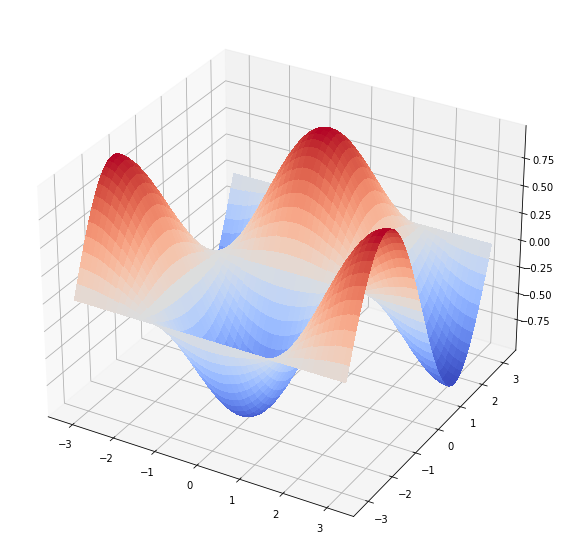

In [10]:
### Vizualize function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (20,10))
X, Y = np.meshgrid(x_range, y_range)
Z = np.cos(X) * np.sin(Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

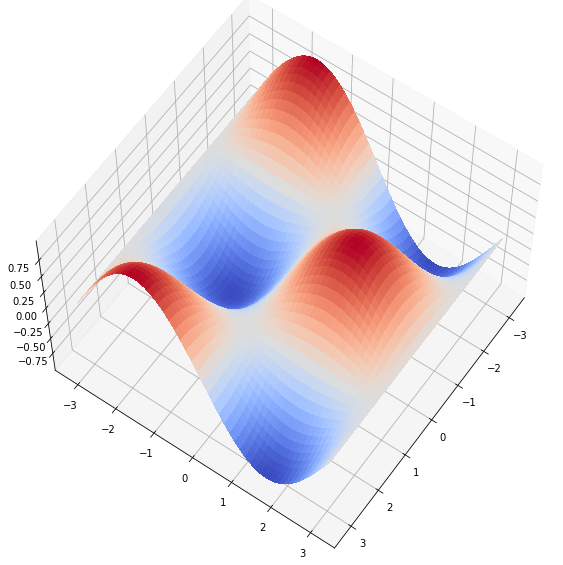

In [11]:
### Vizualize function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (20,10))
X, Y = np.meshgrid(x_range, y_range)
Z = np.cos(X) * np.sin(Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(60, 35)


There are now 4 directions: left-up, right-up, left-down, right-down.

For 3d, need to be objective focused instead of directionally focused.

In [61]:
### Create lists to hold paths to min and max
x_path_min = []
y_path_min = []
x_path_max = []
y_path_max = []

# start_x = random.uniform(-1*math.pi, math.pi)
# start_y = random.uniform(-1*math.pi, math.pi)

start_pos = [0.5, 2.0]

### Look at gradient
### If we are looking for min, go with negative gradient, against positive
x_path_min, y_path_min = findMin(start_pos)

# x_path_max, y_path_max = findMax(start_pos)


### If we are looking for max, go with positive gradient, againset negeative

X = 0.5 	DzDx = -0.4359404146671295 	Y = 2.0 	DzDy = -0.36520320177078247
X = 0.501 	DzDx = -0.43653807044029236 	Y = 2.001 	DzDy = -0.3658008277416229
X = 0.502 	DzDx = -0.43713411688804626 	Y = 2.002 	DzDy = -0.36639702320098877
X = 0.503 	DzDx = -0.437728613615036 	Y = 2.0029999999999997 	DzDy = -0.36699140071868896
X = 0.504 	DzDx = -0.43832147121429443 	Y = 2.0039999999999996 	DzDy = -0.367584228515625
X = 0.505 	DzDx = -0.43891265988349915 	Y = 2.0049999999999994 	DzDy = -0.36817556619644165
X = 0.506 	DzDx = -0.4395022988319397 	Y = 2.0059999999999993 	DzDy = -0.3687651455402374
X = 0.507 	DzDx = -0.4400903582572937 	Y = 2.0069999999999992 	DzDy = -0.36935311555862427
X = 0.508 	DzDx = -0.440676748752594 	Y = 2.007999999999999 	DzDy = -0.3699394166469574
X = 0.509 	DzDx = -0.4412614703178406 	Y = 2.008999999999999 	DzDy = -0.3705243170261383
X = 0.51 	DzDx = -0.4418446123600006 	Y = 2.009999999999999 	DzDy = -0.37110739946365356
X = 0.511 	DzDx = -0.4424261450767517 	Y = 2.01099

In [53]:
def findMin(start_pos):
    x_path = []
    y_path = []
    
    x_path.append(start_pos[0])
    y_path.append(start_pos[1])
    
    current_x = start_pos[0]
    current_y = start_pos[1]
    
    dzdx = np.Inf
    dzdy = np.Inf
    
    while ((abs(dzdx) > 0.01) or (abs(dzdy > 0.01))):

        ### Calculate gradient
        x = torch.tensor(current_x, requires_grad = True)
        y = torch.tensor(current_y, requires_grad = True)
        z = torch.cos(x) * torch.sin(y)
        z.backward()
        dzdx = x.grad.item()
        dzdy = y.grad.item()
           
           
        print('X = {} \tDzDx = {} \tY = {} \tDzDy = {}'.format(current_x, dzdx, current_y, dzdy))

        ### go with negative gradient, against positive
        if(dzdx < 0):
            current_x = current_x + 0.001
            x_path.append(current_x)
        elif(dzdx > 0):
            current_x = current_x - 0.001
            x_path.append(current_x)
           
        if(dzdy < 0):
            current_y = current_y + 0.001
            y_path.append(current_y)
        elif(dzdy > 0):
            current_y = current_y - 0.001
            y_path.append(current_y)
    
    return np.array(x_path), np.array(y_path)

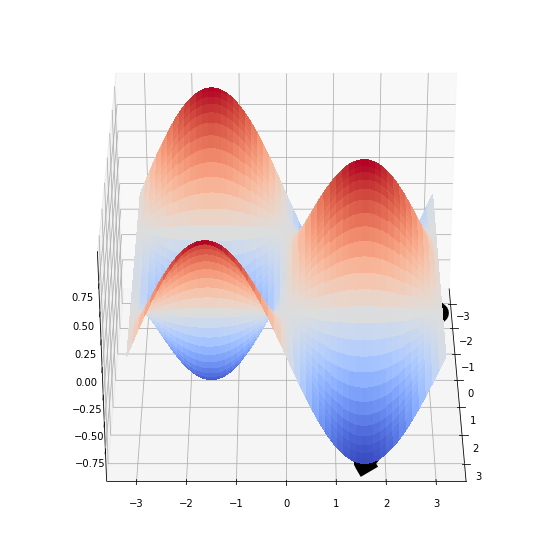

In [83]:
### Vizualize function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (20,10))
X, Y = np.meshgrid(x_range, y_range)
Z = np.cos(X) * np.sin(Y)

z_path_min = np.cos(x_path_min) * np.sin(y_path_min)



# Plot the surface.
line1, = ax.plot(xs = x_path_min, ys = y_path_min, zs = z_path_min, color = 'k', linewidth = 20, marker = 'o')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.view_init(32, 0)